<a href="https://colab.research.google.com/github/Aditya-Dragon/PRODIGY_ML_01/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

In this task, we are going to build a machine learning model to predict house prices based on certain features of the houses. The dataset contains information about the houses, including square footage, number of bedrooms and bathrooms, and more.



In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Required Libraries

In this task, we'll need several Python libraries to work with data and build our machine learning model. Let's start by importing the necessary libraries.

In [95]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Step 1: Data Loading and Exploration

First, loading the dataset and exploring its structure to understand the available features and target variable.

In [96]:
# Train Data
df = pd.read_csv("/content/drive/MyDrive/kaggle dataset/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now loading The Test dataset

In [97]:
# Test data
test_df = pd.read_csv('/content/drive/MyDrive/kaggle dataset/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#Step 2: Data Preprocessing
In this step, I perform data preprocessing tasks, including handling missing values and feature selection.

Feature Selection
I select the following features for my model:

**TotalArea**: The total area of the house.

**BedroomAbvGr**: The number of bedrooms above ground.

**FullBath**: The number of full bathrooms.

**HalfBath**: The number of half bathrooms.

**SalePrice**: The price of the house.



We calculate the total area of each house by summing the first-floor area, second-floor area, and basement area.

we select the mentioned features and combine them to create a new dataframe **newdf**



In [98]:
# Calculate the total area of the house
df['TotalArea'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

# Select the features needed for prediction
selected_features = ['TotalArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']

# Creating a new DataFrame with only the selected features
new_df = df[selected_features]


Doing Same for test_df datframe too

However test dataset doesnot contain **SalePrice** so it is not possible to validate the data later

In [99]:
# Calculate the total area of the house
test_df['TotalArea'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['TotalBsmtSF']

# Select the features you need for prediction
selected_features = ['TotalArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
#selected_features = ['TotalArea', 'BedroomAbvGr', 'FullBath', 'HalfBath','SalePrice']

# Create a new DataFrame with only the selected features
df1 = test_df[selected_features]

#Checking The values

In [100]:
new_df.head()

,TotalArea,BedroomAbvGr,FullBath,HalfBath,SalePrice
0,2566,3,2,1,208500
1,2524,3,2,0,181500
2,2706,3,2,1,223500
3,2473,3,1,0,140000
4,3343,4,2,1,250000


In [101]:
df1.head()

,TotalArea,BedroomAbvGr,FullBath,HalfBath
0,1778.0,2,1,0
1,2658.0,3,1,1
2,2557.0,3,2,1
3,2530.0,3,2,1
4,2560.0,2,2,0


#Handling Missing Values
Replacing missing values with the mean of their respective columns.

In [102]:
# Replace NaN values with the mean of the respective column
new_df['TotalArea'].fillna(new_df['TotalArea'].mean(), inplace=True)
new_df['BedroomAbvGr'].fillna(new_df['BedroomAbvGr'].mean(), inplace=True)
new_df['FullBath'].fillna(new_df['FullBath'].mean(), inplace=True)
new_df['HalfBath'].fillna(new_df['HalfBath'].mean(), inplace=True)


<ipython-input-102-97c06c14e2e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['TotalArea'].fillna(new_df['TotalArea'].mean(), inplace=True)
<ipython-input-102-97c06c14e2e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['BedroomAbvGr'].fillna(new_df['BedroomAbvGr'].mean(), inplace=True)
<ipython-input-102-97c06c14e2e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FullBath'].fillna(new_df['FullBath'].mean

In [103]:
# Replace NaN values with the mean of the respective column in test_df
test_df['TotalArea'].fillna(test_df['TotalArea'].mean(), inplace=True)
test_df['BedroomAbvGr'].fillna(test_df['BedroomAbvGr'].mean(), inplace=True)
test_df['FullBath'].fillna(test_df['FullBath'].mean(), inplace=True)
test_df['HalfBath'].fillna(test_df['HalfBath'].mean(), inplace=True)


#Step 3: Feature Selection

Linear regression algorithm is used to train the model.

X_train and y_train is selected from new_df (train dataset) dataframe to train the model

X_test is selected from test_df(test dataset)

In [104]:
# Spliting the data
X_train = new_df[['TotalArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y_train = new_df['SalePrice']

# Ensuring the test data has the same features
X_test = test_df[['TotalArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
#y_test = test_df['SalePrice']


#Step 4: Training the model

In [105]:
# Creating a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Making predictions on test data
predictions = model.predict(X_test)

In [106]:
# Now 'predictions' contains the predicted house prices for the test data
print(predictions)

[118470.32857928 180205.55748622 203575.74716657 ... 127824.4201548
 107614.24485555 233095.4175369 ]


#Step 5: Visualising with histogram

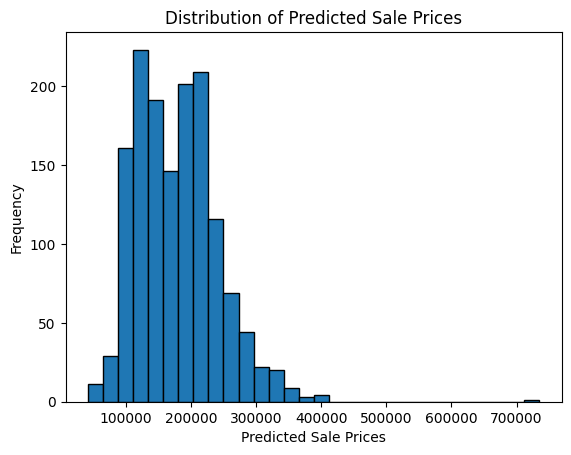

In [107]:
import matplotlib.pyplot as plt

# Plot a histogram of predictions
plt.hist(predictions, bins=30, edgecolor='k')
plt.xlabel('Predicted Sale Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Sale Prices')
plt.show()


#Limitations
test data set doesn't contains **SalePrice** so it is not possible to evaluate the metrices..
Hence we can not predict the how good the model is..

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


NameError: ignored